# SlideseqV2 (mouse olfactory bulb)

We analyzed the mouse olfactory bulb SlideseqV2 dataset. This data can be obtained from the website (https://singlecell.broadinstitute.org/single_cell/study/SCP815/highly-sensitive-spatial-transcriptomics-at-near-cellular-resolution-with-slide-seqv2#study-download).

## 1. Import packages

In [1]:
import DiffGSP as dg
import torch
import scanpy as sc
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial']

/home/sunshuli/anaconda3/envs/DiffGSP/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Read data

In [2]:
data_name = 'Puck_200127_15'
# counts = pd.read_csv(f'/storage/sunshuli/datasets/SlideseqV2/{data_name}/{data_name}.digital_expression.txt', sep='\t', index_col=0)
# coor_df = pd.read_csv(f'/storage/sunshuli/datasets/SlideseqV2/{data_name}/{data_name}_bead_locations.csv', index_col=3)
# used_barcode = pd.read_csv(f'/storage/sunshuli/datasets/SlideseqV2/{data_name}/used_barcodes.txt', sep='\t', header=None)[0]

# adata = sc.AnnData(counts.T)
# adata.X = csr_matrix(adata.X)
# coor_df = coor_df.loc[adata.obs_names, ['xcoord', 'ycoord']]
# adata.obsm['spatial'] = coor_df.to_numpy()
# adata.var_names_make_unique()
# adata = adata[used_barcode,]
# adata.obs['in_tissue'] = 1
# adata.write_h5ad(f'/storage/sunshuli/datasets/SlideseqV2/{data_name}/{data_name}.h5ad')
adata = sc.read_h5ad(f'/storage/sunshuli/datasets/SlideseqV2/{data_name}/{data_name}.h5ad')
adata

AnnData object with n_obs × n_vars = 20139 × 21220
    obs: 'in_tissue'
    obsm: 'spatial'

## 3. Data processing, including filtering genes and identifying svgs

In [3]:
mito_genes = adata.var_names.str.startswith('mt-')
adata = adata[:, ~mito_genes]
adata = adata[:, dg.prefilter_genes(adata, min_cells=50)]
svgs = dg.select_svgs(adata, svg_method='gft_top', n_top=2000)
adata = adata[:, svgs]
adata_raw = adata.copy()
adata

View of AnnData object with n_obs × n_vars = 20139 × 2000
    obs: 'in_tissue'
    obsm: 'spatial'

## 4. Run DiffGSP

In [4]:
adata = dg.run_diffgsp_subgraph(adata, k=2, variable=[0.05, 0.02], partition=[3, 3], data_type='Slideseq', dic_storage=False, array_key=['x', 'y'])

Test: 100%|███████████████████████████████████████████████| 9/9 [00:35<00:00,  3.93s/it, Finish=9/9]


## 5. Downstream analysis

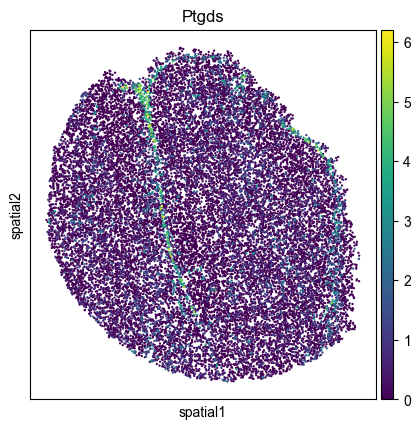

In [5]:
sc.pp.log1p(adata)
sc.pl.spatial(adata, color='Ptgds', spot_size=30)

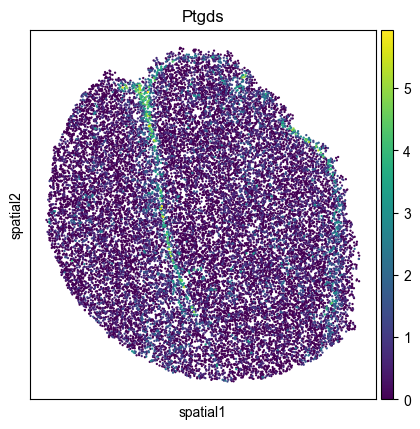

In [6]:
sc.pp.log1p(adata_raw)
sc.pl.spatial(adata_raw, color='Ptgds', spot_size=30)